In [5]:
import pandas as pd

In [6]:
df1=pd.read_csv(r'C:\Users\acer\Downloads\IMBD Dataset.csv')

In [32]:
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...


True

In [5]:
def preprocess_text(text):
    text=text.lower()
    text=text.translate(str.maketrans('','',string.punctuation))
    tokens=word_tokenize(text)
    tokens=[word for word in tokens if word not in stopwords.words('english')]
    tokens=[lemmatizer.lemmatize(word) for word in tokens]
    return''.join(tokens)
    df1['Cleaned_Review']=df1['Review'].apply(preprocess_text)

In [26]:
print(df1.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [20]:
from textblob import TextBlob

In [10]:
print(df1.columns)

Index(['review', 'sentiment'], dtype='object')


In [8]:
df1['Cleaned_Review']=''

In [12]:
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment.polarity

In [21]:
df1['Sentiment_Score']=df1['Cleaned_Review'].apply(get_sentiment)

In [17]:
df1['Sentiment_Label']=df1['Sentiment_Score'].apply(lambda x:('Positive' if x>0 else ('Negative' if x<0 else 'Neutral')))

In [33]:
df1['Sentiment_Label']=''

In [18]:
df1['Sentiment_Score']=''

In [24]:
print(df1[['review','Sentiment_Score','Sentiment_Label']].head())

                                              review Sentiment_Score  \
0  One of the other reviewers has mentioned that ...                   
1  A wonderful little production. <br /><br />The...                   
2  I thought this was a wonderful way to spend ti...                   
3  Basically there's a family where a little boy ...                   
4  Petter Mattei's "Love in the Time of Money" is...                   

  Sentiment_Label  
0                  
1                  
2                  
3                  
4                  


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
sid=SentimentIntensityAnalyzer()

In [21]:
def vader_sentiment(text):
    return sid.polarity_scores(text)['compound']

In [22]:
df1['VADER_Sentiment_Score']=df1['Cleaned_Review'].apply(vader_sentiment)

In [23]:
df1['VADER_Sentiment']=df1['VADER_Sentiment_Score'].apply(lambda x:'Positive' if x>0 else('Negative'if x<0 else 'Neutral'))

In [26]:
df1['VADER_Sentiment_Label']=''

In [28]:
df1['Review']=''

In [35]:
print(df1[['Review','VADER_Sentiment_Score','VADER_Sentiment_Label']].tail())

      Review  VADER_Sentiment_Score VADER_Sentiment_Label
49995                           0.0                      
49996                           0.0                      
49997                           0.0                      
49998                           0.0                      
49999                           0.0                      


In [30]:
import matplotlib.pyplot as plt

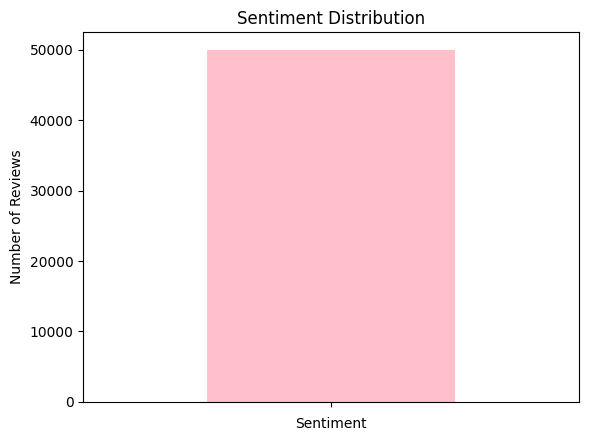

In [37]:
df1['Sentiment_Label'].value_counts().plot(kind='bar',color=['pink','red','blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()